In [1]:
cd /Users/dcox/Dropbox/InsightFellowship/Glimpse/

/Users/dcox/Dropbox/InsightFellowship/Glimpse


# Baseline models for Glimpse K12. 

In [2]:
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sns

# Baseline models for dfs with continuous outcome variables = linear regression. 

### Read in the data

In [3]:
most_feats = pd.read_csv('most_feats_cont.csv')

### Set up dfs for predictor and outcome variables 

In [4]:
mostFeats_MathOutc = most_feats['ScantronMathPostTest']
mostFeats_ReadOutc = most_feats['ScantronReadingPostTest']
mostFeats_pred = most_feats.drop(['ScantronMathPostTest', 'ScantronReadingPostTest'], axis=1)

In [5]:
# Add features of growth relative to available time points. 
# Math
mostFeats_pred['math_growth_prepost'] = mostFeats_MathOutc - mostFeats_pred['ScantronMathPreTest']
mostFeats_pred['math_growth_midpost'] = mostFeats_MathOutc - mostFeats_pred['ScantronMathMidTest']
mostFeats_pred['math_growth_premid'] = mostFeats_pred['ScantronMathMidTest'] - mostFeats_pred['ScantronMathPreTest']
# Reading
mostFeats_pred['read_growth_prepost'] = mostFeats_ReadOutc - mostFeats_pred['ScantronReadingPreTest']
mostFeats_pred['read_growth_midpost'] = mostFeats_ReadOutc - mostFeats_pred['ScantronReadingMidTest']
mostFeats_pred['math_growth_premid'] = mostFeats_pred['ScantronReadingMidTest'] - mostFeats_pred['ScantronReadingPreTest']

### Recode categorical strings with number labels and save those dictionaries

In [6]:
# Most features df
mostFeats_predCols = list(mostFeats_pred)
mostFeats_predCodes = []
for i in mostFeats_predCols:
    mostFeats_pred[i] = mostFeats_pred[i].astype('category')
    d = dict(enumerate(mostFeats_pred[i].cat.categories))
    mostFeats_predCodes.append(d)
    mostFeats_pred[i] = mostFeats_pred[i].astype('category')
    mostFeats_pred[i] = mostFeats_pred[i].cat.codes

### Packages, functions, and algorithms. 

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

### Predicting outcomes for using the 'most features' df. 

Mean Absolute Error: 111.36214186972434
Mean Squared Error: 55086.21710829417
Root Mean Squared Error: 234.7045315035357
R^2 Math:, 0.6218186197995237


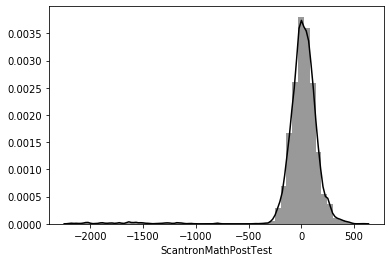

In [9]:
# Math outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_MathOutc, test_size=0.20, random_state = 649)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 Math:,', r2_score(y_test, y_pred))
residuals = y_test - y_pred
sns.distplot(residuals, bins=50, color='black')

Mean Absolute Error: 165.2588531341874
Mean Squared Error: 72186.24801124337
Root Mean Squared Error: 268.67498583091685
R^2 Reading:, 0.7846833799409858


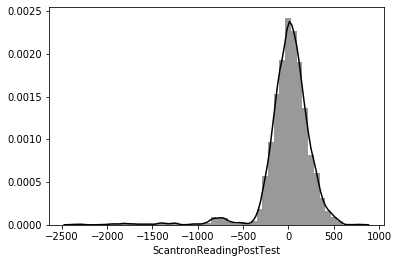

In [10]:
# Reading outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_ReadOutc, test_size=0.20, random_state = 649)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 Reading:,', r2_score(y_test, y_pred))
residuals = y_test - y_pred
sns.distplot(residuals, bins=50, color='black')

# Baseline models for dfs with binary outcome variables = logistics regression. 

In [21]:
most_feats_2 = pd.read_csv('most_feats_cont.csv')
most_feats = pd.read_csv('most_feats_binary.csv')

In [24]:
mostFeats2_MathOutc = most_feats_2['ScantronMathPostTest']
mostFeats2_ReadOutc = most_feats_2['ScantronReadingPostTest']
mostFeats_MathOutc = most_feats['ScantronMathPostTestBenchmarks']
mostFeats_ReadOutc = most_feats['ScantronReadingPostTestBenchmarks']
mostFeats2_pred = most_feats_2.drop(['ScantronMathPostTest', 'ScantronReadingPostTest'], axis=1)
mostFeats_pred = most_feats.drop(['ScantronMathPostTestBenchmarks', 'ScantronReadingPostTestBenchmarks'], axis=1)

In [25]:
# Add features of growth relative to available time points. 
# Math
mostFeats_pred['math_growth_prepost'] = mostFeats2_MathOutc - mostFeats2_pred['ScantronMathPreTest']
mostFeats_pred['math_growth_midpost'] = mostFeats2_MathOutc - mostFeats2_pred['ScantronMathMidTest']
mostFeats_pred['math_growth_premid'] = mostFeats2_pred['ScantronMathMidTest'] - mostFeats2_pred['ScantronMathPreTest']
# Reading
mostFeats_pred['read_growth_prepost'] = mostFeats2_ReadOutc - mostFeats2_pred['ScantronReadingPreTest']
mostFeats_pred['read_growth_midpost'] = mostFeats2_ReadOutc - mostFeats2_pred['ScantronReadingMidTest']
mostFeats_pred['math_growth_premid'] = mostFeats2_pred['ScantronReadingMidTest'] - mostFeats2_pred['ScantronReadingPreTest']

In [33]:
# Most features df
mostFeats_predCols = list(mostFeats_pred)
mostFeats_predCodes = []
for i in mostFeats_predCols:
    mostFeats_pred[i] = mostFeats_pred[i].astype('category')
    d = dict(enumerate(mostFeats_pred[i].cat.categories))
    mostFeats_predCodes.append(d)
    mostFeats_pred[i] = mostFeats_pred[i].astype('category')
    mostFeats_pred[i] = mostFeats_pred[i].cat.codes

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix

In [35]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='g')# font size

## Predicting outcomes for the 'most features' df. 

Accuracy: 0.8183756886440376
Precision: 0.8468864468864469
Recall: 0.7928669410150891
ROC_AUC:, 0.8193401470106799
F1: 0.8189868933758413


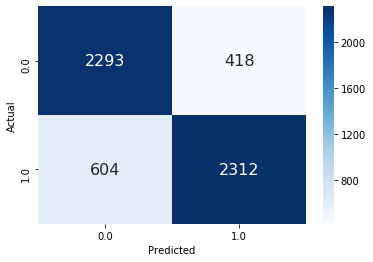

In [36]:
# Math outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_MathOutc, test_size=0.20, random_state = 649)
regressor = LogisticRegression(solver='liblinear')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))  
print('Precision:', metrics.precision_score(y_test, y_pred))  
print('Recall:', recall_score(y_test, y_pred))
print('ROC_AUC:,', roc_auc_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
plot_cm(y_test, y_pred)

Accuracy: 0.8473431668740004
Precision: 0.8744860419822549
Recall: 0.9354166666666667
ROC_AUC:, 0.7458261604182607
F1: 0.9039257353763561


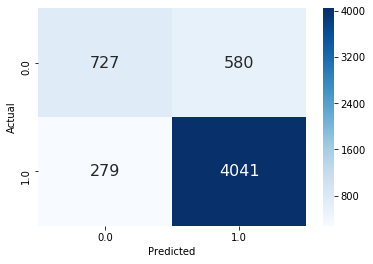

In [37]:
# Reading outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_ReadOutc, test_size=0.20, random_state = 649)
regressor = LogisticRegression(solver='liblinear')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))  
print('Precision:', metrics.precision_score(y_test, y_pred))  
print('Recall:', recall_score(y_test, y_pred))
print('ROC_AUC:,', roc_auc_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
plot_cm(y_test, y_pred)